In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pypsa
import pandas as pd
import yaml
import sys

plt.style.use(["bmh", "../../matplotlibrc"])
sns.set_palette("colorblind")

import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 100

sys.path.append("../scripts")
from plot import get_price_duration, get_cost_recovery, get_load_duration

COUNTRY = "UK"

In [40]:
with open('../../config/config.yaml', 'r') as file:
    config = yaml.safe_load(file)

In [41]:
voll_files = {
    "LT": f"../../results/20240506-35a-35a/network_solved_LT-country+{COUNTRY}-number_years+35-voll+true.nc",
    "ST perfect foresight": f"../../results/20240506-35a-35a/network_myopic_LT-country+{COUNTRY}-number_years+35-voll+true_ST-number_years+35-perfect_foresight+true-hydrogen_bid+0-battery_bid+0.nc",
    "ST myopic": f"../../results/20240506-35a-35a/network_myopic_LT-country+{COUNTRY}-number_years+35-voll+true_ST-number_years+35-horizon+96-overlap+48.nc",
    "ST myopic / capacities +5%": f"../../results/20240506-35a-35a/network_myopic_LT-country+{COUNTRY}-number_years+35-voll+true_ST-number_years+35-horizon+96-overlap+48-perturbation+1.05.nc",
    "ST myopic / capacities -5%": f"../../results/20240506-35a-35a/network_myopic_LT-country+{COUNTRY}-number_years+35-voll+true_ST-number_years+35-horizon+96-overlap+48-perturbation+0.95.nc",
}
ns_voll = {k: pypsa.Network(v) for k, v in voll_files.items()}

INFO:pypsa.io:Imported network network_solved_LT-country+UK-number_years+35-voll+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+UK-number_years+35-voll+true_ST-number_years+35-perfect_foresight+true-hydrogen_bid+0-battery_bid+0.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+UK-number_years+35-voll+true_ST-number_years+35-horizon+96-overlap+48.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+UK-number_years+35-voll+true_ST-number_years+35-horizon+96-overlap+48-perturbation+1.05.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+UK-number_years+35-voll+true_ST-number_years+35-horizon+96-overlap+48-perturbation+0.95.nc has buses, carriers, generators, links, loads, stores


In [42]:
pwl_files = {
    "LT": f"../../results/20240506-35a-35a/network_solved_LT-country+{COUNTRY}-number_years+35-elastic_pwl+default.nc",
    "ST perfect foresight": f"../../results/20240506-35a-35a/network_myopic_LT-country+{COUNTRY}-number_years+35-elastic_pwl+default_ST-number_years+35-perfect_foresight+true-hydrogen_bid+0-battery_bid+0.nc",
    "ST myopic": f"../../results/20240506-35a-35a/network_myopic_LT-country+{COUNTRY}-number_years+35-elastic_pwl+default_ST-number_years+35-horizon+96-overlap+48.nc",
    "ST myopic / capacities +5%": f"../../results/20240506-35a-35a/network_myopic_LT-country+{COUNTRY}-number_years+35-elastic_pwl+default_ST-number_years+35-horizon+96-overlap+48-perturbation+1.05.nc",
    "ST myopic / capacities -5%": f"../../results/20240506-35a-35a/network_myopic_LT-country+{COUNTRY}-number_years+35-elastic_pwl+default_ST-number_years+35-horizon+96-overlap+48-perturbation+0.95.nc",
}
ns_pwl = {k: pypsa.Network(v) for k, v in pwl_files.items()}

INFO:pypsa.io:Imported network network_solved_LT-country+UK-number_years+35-elastic_pwl+default.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+UK-number_years+35-elastic_pwl+default_ST-number_years+35-perfect_foresight+true-hydrogen_bid+0-battery_bid+0.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+UK-number_years+35-elastic_pwl+default_ST-number_years+35-horizon+96-overlap+48.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+UK-number_years+35-elastic_pwl+default_ST-number_years+35-horizon+96-overlap+48-perturbation+1.05.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+UK-number_years+35-elastic_pwl+default_ST-number_years+35-horizon+96-overlap+48-perturbation+0.95.nc has buses, carriers, generators, links, loads, stores


In [43]:
pdc_voll = {k: get_price_duration(v) for k, v in ns_voll.items()}
pdc_pwl = {k: get_price_duration(v) for k, v in ns_pwl.items()}

/tmp/ipykernel_1628255/1933599830.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


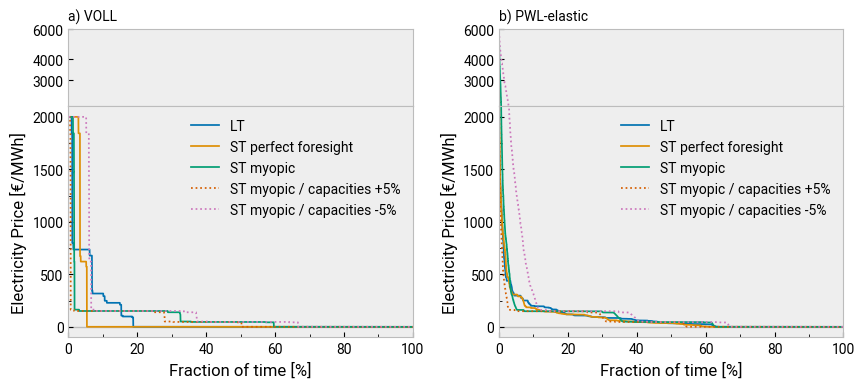

In [44]:
pu_colors = sns.color_palette("rocket", 5)
cat_colors = sns.color_palette("colorblind")
lw = 1.25

fig, axs = plt.subplots(
    2,
    2,
    figsize=(10, 4),
    height_ratios=[1, 3],
    gridspec_kw={"hspace": 0, "wspace": 0.25},
)

for key, pdc in pdc_voll.items():
    ls = ":" if "capacities" in key else "-"
    for i in range(2):
        pdc.plot(ax=axs[i, 0], label=key, linewidth=lw, linestyle=ls)

for key, pdc in pdc_pwl.items():
    ls = ":" if "capacities" in key else "-"
    for i in range(2):
        pdc.plot(ax=axs[i, 1], label=key, linewidth=lw, linestyle=ls)

axs[0, 0].set_title("a) VOLL", loc="left", fontsize="medium")
axs[0, 1].set_title("b) PWL-elastic", loc="left", fontsize="medium")

for i in range(2):

    axs[0, i].set_ylim(2100, 6000)
    axs[0, i].set_yscale("log")
    axs[0, i].set_yticks([3000, 4000, 6000])
    axs[0, i].set_yticklabels(["3000", "4000", "6000"])
    axs[0, i].set_yticks([], minor=True)
    axs[0, i].set_xticks([])
    axs[0, i].set_xticks([], minor=True)
    axs[0, i].set_xlim(0, 100)

    axs[1, i].set_ylim(-100, 2100)
    axs[1, i].set_ylabel("Electricity Price [€/MWh]")
    axs[1, i].set_yticks(range(0, 2001, 250), minor=True)
    axs[1, i].set_xticks(range(0, 101, 20))
    axs[1, i].set_xticks(range(0, 101, 10), minor=True)
    axs[1, i].set_xlabel("Fraction of time [%]")
    axs[1, i].axhline(0, linewidth=1, color="#bbb", zorder=0)
    axs[1, i].set_xlim(0, 100)
    axs[1, i].legend()

plt.tight_layout()

for ext in ["png", "pdf"]:
    plt.savefig(f"../../figures/figure-myopia-{COUNTRY}.{ext}", bbox_inches="tight")

In [45]:
ldc_voll = {k: get_load_duration(v) for k, v in ns_voll.items()}
ldc_pwl = {k: get_load_duration(v) for k, v in ns_pwl.items()}

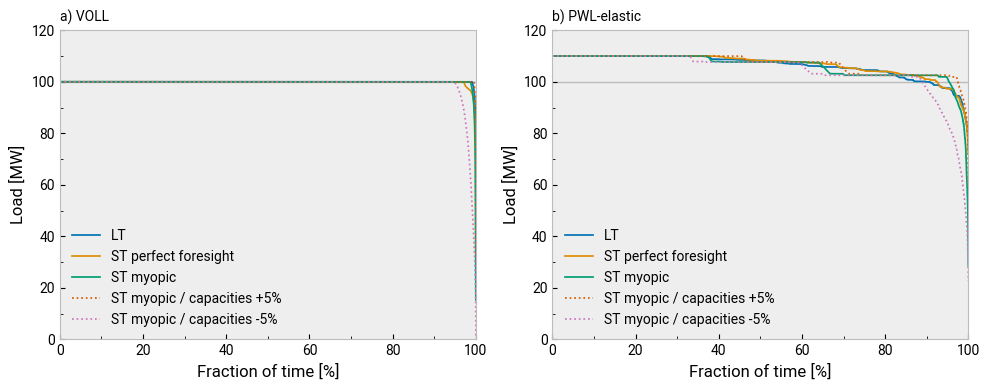

In [46]:
cat_colors = sns.color_palette("colorblind")
lw = 1.25

fig, (ax0, ax1) = plt.subplots(
    1,
    2,
    figsize=(10, 4),
)

for key, ldc in ldc_voll.items():
    ls = ":" if "capacities" in key else "-"
    ldc.plot(ax=ax0, label=key, linewidth=lw, linestyle=ls)

for key, ldc in ldc_pwl.items():
    ls = ":" if "capacities" in key else "-"
    ldc.plot(ax=ax1, label=key, linewidth=lw, linestyle=ls)

ax0.set_title("a) VOLL", loc="left", fontsize="medium")
ax1.set_title("b) PWL-elastic", loc="left", fontsize="medium")

ax0.set_ylim(0, 120)
ax0.set_ylabel("Load [MW]")
ax0.set_yticks(range(0, 121, 10), minor=True)
ax0.set_xticks(range(0, 101, 20))
ax0.set_xticks(range(0, 101, 10), minor=True)
ax0.set_xlabel("Fraction of time [%]")
ax0.axhline(100, linewidth=1, color="#bbb", zorder=0)
ax0.set_xlim(0, 100)
ax0.legend()

ax1.set_ylim(0, 120)
ax1.set_ylabel("Load [MW]")
ax1.set_yticks(range(0, 121, 10), minor=True)
ax1.set_xticks(range(0, 101, 20))
ax1.set_xticks(range(0, 101, 10), minor=True)
ax1.set_xlabel("Fraction of time [%]")
ax1.axhline(100, linewidth=1, color="#bbb", zorder=0)
ax1.set_xlim(0, 100)
ax1.legend()


plt.tight_layout()

for ext in ["png", "pdf"]:
    plt.savefig(f"../../figures/figure-myopia-ldc-{COUNTRY}.{ext}", bbox_inches="tight")

In [47]:
crf_voll = pd.DataFrame(
    {k: get_cost_recovery(v).sum(axis=1) for k, v in ns_voll.items()}
)
crf_pwl = pd.DataFrame({k: get_cost_recovery(v).sum(axis=1) for k, v in ns_pwl.items()})

In [48]:
crf_voll.columns = crf_voll.columns.str.replace("ST ", "ST\n").str.replace(" / ", "\n")
crf_pwl.columns = crf_pwl.columns.str.replace("ST ", "ST\n").str.replace(" / ", "\n")

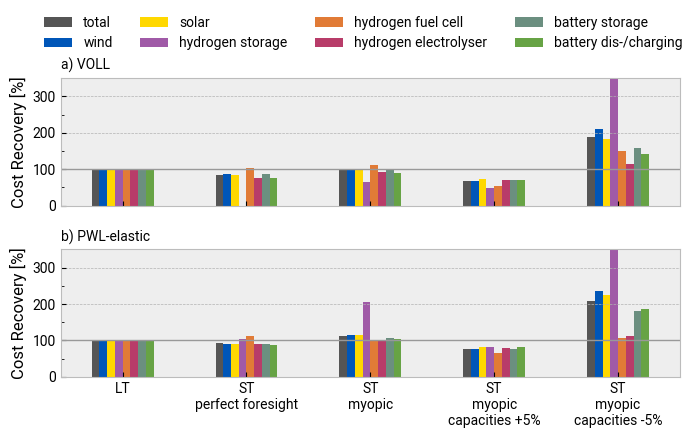

In [49]:
fig, axs = plt.subplots(2, 1, figsize=(7, 4), sharex=True, sharey=True)

crf_voll[::-1].T.plot.bar(ax=axs[0], legend=False, color=config["colors"])
crf_pwl[::-1].T.plot.bar(ax=axs[1], legend=False, color=config["colors"])

for ax in axs:
    ax.set_xlabel("")
    ax.set_ylabel("Cost Recovery [%]")
    ax.grid(axis="y")
    ax.set_ylim(0, 270)
    ax.set_yticks(range(0, 400, 100))
    ax.set_yticks(range(0, 400, 50), minor=True)
    ax.axhline(100, color="#999", linewidth=1)

plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

axs[0].set_title("a) VOLL", loc="left", fontsize="medium")
axs[1].set_title("b) PWL-elastic", loc="left", fontsize="medium")

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=4, loc="outside upper right", bbox_to_anchor=(1, 1.1))

for ext in ["pdf", "png"]:
    plt.savefig(f"../../figures/figure-crf-{COUNTRY}.{ext}", bbox_inches="tight", dpi=300)

In [50]:
crf_pwl.round(1)

,LT,ST\nperfect foresight,ST\nmyopic,ST\nmyopic\ncapacities +5%,ST\nmyopic\ncapacities -5%
carrier,,,,,
battery dis-/charging,100.0,88.1,104.7,81.5,186.0
battery storage,100.0,90.3,105.2,76.5,181.6
hydrogen electrolyser,100.0,89.6,100.3,79.9,112.2
hydrogen fuel cell,100.0,112.4,98.7,64.1,107.3
hydrogen storage,100.0,103.4,204.6,81.3,948.9
solar,100.0,91.0,114.9,81.2,224.2
wind,100.0,88.9,115.2,75.9,235.6
total,100.0,92.3,111.6,76.4,208.7


In [51]:
crf_voll.round(1)

,LT,ST\nperfect foresight,ST\nmyopic,ST\nmyopic\ncapacities +5%,ST\nmyopic\ncapacities -5%
carrier,,,,,
battery dis-/charging,100.0,76.4,89.6,69.4,142.1
battery storage,100.0,86.7,101.4,71.7,158.0
hydrogen electrolyser,100.0,76.2,93.7,71.5,113.3
hydrogen fuel cell,100.0,102.4,111.0,53.5,150.0
hydrogen storage,100.0,-0.0,65.1,47.5,517.8
solar,100.0,83.2,99.2,72.5,184.4
wind,100.0,87.2,99.8,68.8,211.7
total,100.0,85.0,99.7,67.7,187.3
